### Part1. Sphere Project

In [ ]:
'''
Only import following libraries
+ Setup Sphere parameters
'''
import matplotlib as mpl
import matplotlib.pyplot as plt
from math import cos  # (not used here but imported as required)
import numpy as np

# Given Sphere radius
r = 100

# Determine resolution, higher means better quality(tested with 100~1000)
num_points = 1000

In [18]:
'''
Set up coordinate parameters
'''
# Create a grid of (x,y) values over the square [-r, r] x [-r, r] using np.linspace
x = np.linspace(-r, r, num_points)
y = np.linspace(-r, r, num_points)
# X, Y = np.meshgrid(x, y) # <- meshgrid빼고 진행
# Instead of using meshgrid, create 2D arrays manually
X = np.zeros((num_points, num_points))
Y = np.zeros((num_points, num_points))

# Fill the arrays with the appropriate values
for i in range(num_points):
    for j in range(num_points):
        X[i, j] = x[j]  # x values vary along columns
        Y[i, j] = y[i]  # y values vary along rows


# Add mask parameter to "only" consider points within the circle x^2 + y^2 <= r^2
mask = X**2 + Y**2 <= r**2

# Parametrization for the positive (upper) hemisphere:
# z = sqrt(r^2 - x^2 - y^2)
Z = np.zeros_like(X)
Z[mask] = np.sqrt(r**2 - X[mask]**2 - Y[mask]**2)

### Derivatives computed by hand:
    - z(x,y) = sqrt(r^2 - x^2 - y^2)

    - dz/dx = -x / sqrt(r^2 - x^2 - y^2)
    
    - dz/dy = -y / sqrt(r^2 - x^2 - y^2)

### Thus the (unnormalized) normal vector is:

    - n = (-dz/dx, -dz/dy, 1) = (x/sqrt(r^2 - x^2 - y^2), y/sqrt(r^2 - x^2 - y^2), 1)

### When normalized, this becomes:

    - n_normalized = (x/r, y/r, z/r)

#### which is the standard result for a sphere.

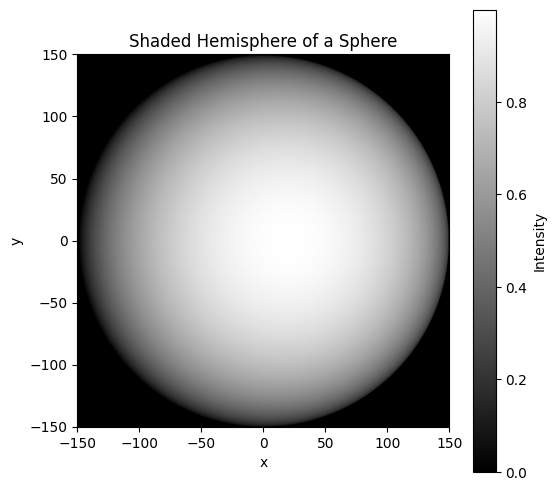

In [19]:
# Define the illumination direction and normalize it
I = np.array([0.13, 0, 0.94])
I = I / np.linalg.norm(I)

# Compute intensity using the cosine law:
# intensity = n_normalized · I = (x/r)*I[0] + (y/r)*I[1] + (z/r)*I[2] # since we masked the circle, we used followed method below 
intensity = np.zeros_like(X)
intensity[mask] = (X[mask] / r * I[0] +
                   Y[mask] / r * I[1] +
                   Z[mask] / r * I[2])

# Ensure intensities are within [0,1]
intensity = np.clip(intensity, 0, 1)

# Plot the result
plt.figure(figsize=(6,6))
plt.imshow(intensity, extent=(-r, r, -r, r), origin='lower', cmap='gray')
plt.colorbar(label='Intensity')
plt.title('Shaded Hemisphere of a Sphere')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


### Bonus Question!

#### Insert code that creates an animation with a moving light source that moves around the sphere with 30 different frames [in any way you like]! You are allowed to import further libraries for this, of course. 

In [11]:
'''
Import Libraries & also setup Ipython for animation in Jupyter Environment
'''
import matplotlib.animation as animation
from IPython.display import HTML
# Jupyter에서 애니메이션을 보기 위한 설정
from matplotlib import rc
rc('animation', html='jshtml')


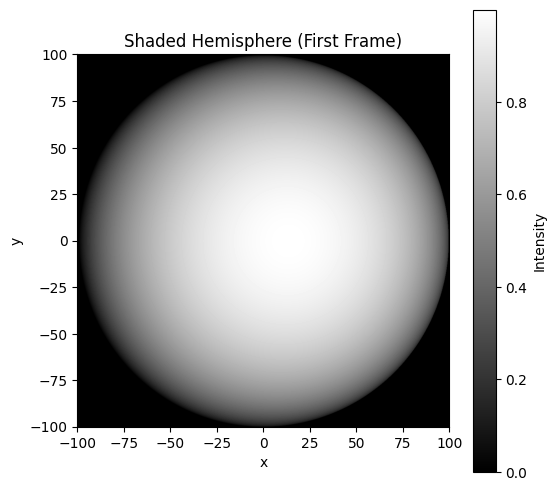

In [12]:
# Plot initial image
fig, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(intensity, extent=(-r, r, -r, r), origin='lower', cmap='gray')
ax.set_title('Shaded Hemisphere (First Frame)')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.colorbar(im, ax=ax, label='Intensity')

In [13]:
'''
Function to animate the moving light and it's reaction to the surface of sphere
'''
def moving_light(frame):
    # Compute angle for current frame (0 to 2pi over 30 frames)
    theta = 2 * np.pi * frame / 30.0
    # Light source moves in the x-y plane, z component stays 0.94.
    I = np.array([0.13 * np.cos(theta), 0.13 * np.sin(theta), 0.94])
    I = I / np.linalg.norm(I)
    
    # Recalculate the intensity for the current light direction.
    new_intensity = np.zeros_like(X)
    new_intensity[mask] = (X[mask] / r * I[0] +
                           Y[mask] / r * I[1] +
                           Z[mask] / r * I[2])
    new_intensity = np.clip(new_intensity, 0, 1)
    
    # Update the image data.
    im.set_array(new_intensity)
    ax.set_title(f'Shaded Hemisphere (Frame {frame+1})')
    return [im]

In [14]:
# Create the animation with 30 frames and an interval of 200ms per frame.
move_light = animation.FuncAnimation(fig, moving_light, frames=30, interval=200, blit=True)
move_light